In [1]:
import pandas as pd

import numpy as np

from sklearn import model_selection

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.linear_model import ElasticNet

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from math import sqrt

import statsmodels.api as sm

import seaborn as sns

import matplotlib.pyplot as plt

## BodyFat data set trying to predict the body fat based on diffrent parameters of the person body while the main goal is using diffrent models in order to reduce the loss function

### defining the variables matrix

In [2]:
alpha=[0,0.1,0.25,0.5,1,5]
l1_ratio=[0,0.2,0.4,0.6,0.8,1] 

## Understanding the data

In [3]:
df=pd.read_csv('bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


Density      1.1089
BodyFat     47.5000
Age         81.0000
Weight     363.1500
Height      77.7500
Neck        51.2000
Chest      136.2000
Abdomen    148.1000
Hip        147.7000
Thigh       87.3000
Knee        49.1000
Ankle       33.9000
Biceps      45.0000
Forearm     34.9000
Wrist       21.4000
dtype: float64

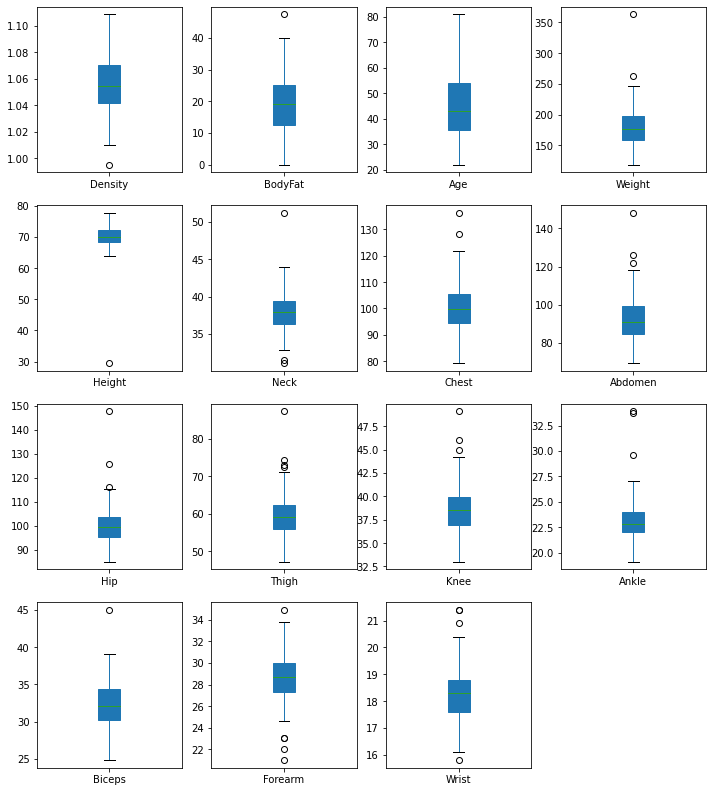

In [4]:
df.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
df.max()

In [5]:
df.shape

(252, 15)

In [6]:
df = df[df['BodyFat'] < 40]  
df = df[df['Weight'] < 250]  
df = df[df['Height'] > 40]  

In [7]:
df.shape

(247, 15)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

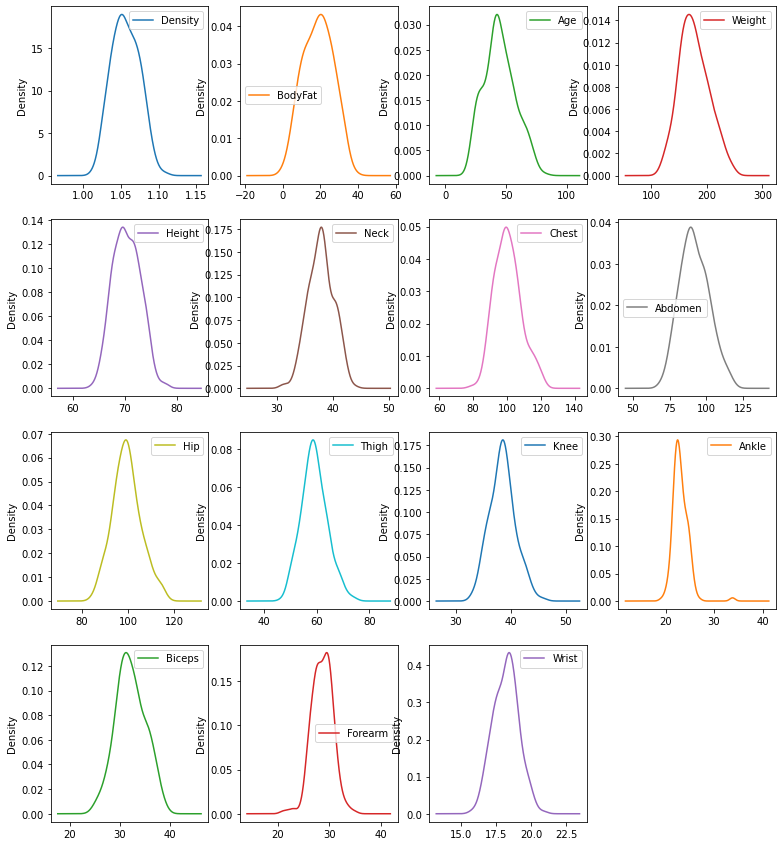

In [8]:
df.plot.density(subplots=True, sharex=False, sharey=False, layout=(4, 4), figsize=(13,15))


In [9]:
y = df['BodyFat']
X = df.drop("BodyFat", axis = 1)
features = X.columns
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
target = "BodyFat"
#X and y values
X = df[features].values
y = df[target].values
Ridge_df=pd.DataFrame(columns=features)

## Checking correlations

<AxesSubplot:>

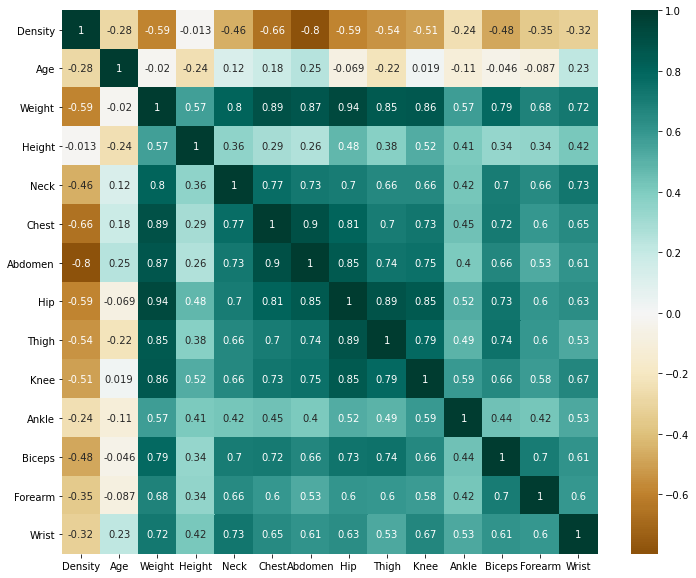

In [10]:

corrs = df[features].corr(method = 'pearson')
plt.figure(figsize=(12,10))  #figure size
sns.heatmap(corrs, cmap='BrBG', center=0, annot = True )


## Ridge 

In [11]:
Ridge_MSE=[]
Ridge_Squ=[]
def check_ridge(alpha):
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    pred = ridge.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    R_square_adj=1 - (1-ridge.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
    a=ridge.coef_
    Ridge_df.loc[len(Ridge_df.index)]=a.tolist()
    Ridge_MSE.append(rmse)
    Ridge_Squ.append(R_square_adj)
for number in alpha:
    check_ridge(number)

In [12]:
Ridge_df["alpha"]=alpha
Ridge_df["Ridge_MSE"]=Ridge_MSE
Ridge_df["Ridge_Squ"]=Ridge_Squ

In [13]:
Ridge_df

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,alpha,Ridge_MSE,Ridge_Squ
0,-393.699973,0.022067,0.015714,0.015910,-0.009061,0.044479,0.020811,0.031584,-0.002566,-0.066370,-0.076446,-0.084695,0.009699,-0.033795,0.00,0.852156,0.973538
1,-56.361911,0.060796,0.002594,-0.335250,-0.187371,-0.062611,0.676505,-0.025005,0.093291,-0.154298,0.213230,0.025975,0.125789,-1.207713,0.10,3.779993,0.775412
2,-24.667093,0.064356,0.001259,-0.368167,-0.204671,-0.072541,0.738166,-0.030319,0.102430,-0.162702,0.240013,0.036269,0.136495,-1.313755,0.25,4.077179,0.738129
3,-12.735828,0.065589,0.000618,-0.380454,-0.211922,-0.076098,0.761451,-0.032314,0.106052,-0.166059,0.249503,0.040003,0.140250,-1.347885,0.50,4.189537,0.723250
4,-6.476091,0.066035,0.000019,-0.386698,-0.217093,-0.077624,0.773804,-0.033348,0.108287,-0.168172,0.253373,0.041697,0.141701,-1.354984,1.00,4.249115,0.715234
5,-1.317882,0.064632,-0.002877,-0.389839,-0.232679,-0.075727,0.785063,-0.033884,0.112987,-0.172665,0.246616,0.040774,0.138153,-1.266086,5.00,4.303963,0.708228


## Lasso

In [14]:
lasso_df=pd.DataFrame(columns=features)
lasso_df

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


In [ ]:
lasso_MSE=[]
lasso_Squ=[]
def check_lasso(alpha):
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_train, y_train) 
    pred_train_lasso= model_lasso.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,pred_train_lasso))
    b=model_lasso.coef_
    lasso_df.loc[len(lasso_df.index)]=b.tolist()
    lasso_MSE.append(rmse)
    lasso_R_adj=1 - (1-model_lasso.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
    lasso_Squ.append(lasso_R_adj)
for number in alpha:
    check_lasso(number)

In [16]:
lasso_df["alpha"]=alpha
lasso_df["lasso_MSE"]=lasso_MSE
lasso_df["lasso_Squ"]=lasso_Squ

In [17]:
lasso_df

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,alpha,lasso_MSE,lasso_Squ
0,-393.699973,0.022067,0.015714,0.015910,-0.009061,0.044479,0.020811,0.031584,-0.002566,-0.066370,-0.076446,-0.084695,0.009699,-0.033795,0.00,0.852156,0.973538
1,-0.000000,0.054000,-0.018725,-0.376570,-0.166087,-0.048110,0.779371,-0.000000,0.079924,-0.089215,0.170836,0.016455,0.082476,-1.086354,0.10,4.369781,0.703344
2,-0.000000,0.035001,-0.039771,-0.341848,-0.121071,-0.010902,0.781546,-0.000000,0.058338,-0.000000,0.040305,0.000000,0.000000,-0.595599,0.25,4.443879,0.696288
3,-0.000000,0.014194,-0.069792,-0.271431,-0.053785,-0.000000,0.813480,0.000000,0.028671,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.50,4.534198,0.685776
4,-0.000000,0.011341,-0.075929,-0.158874,-0.000000,0.000000,0.818742,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,1.00,4.558855,0.681730
5,-0.000000,0.037215,-0.010614,-0.000000,-0.000000,0.000000,0.608767,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,5.00,4.786829,0.645872


## Elastic

In [18]:
elastic_df=pd.DataFrame(columns=features)
elastic_df

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


In [ ]:
elastic_MSE=[]
elastic_Squ=[]
def check_elastic(alpha,ll):
    e_net = ElasticNet(alpha = alpha,l1_ratio=ll)
    e_net.fit(X_train, y_train)
## calculate the prediction and mean square error
    y_pred_elastic = e_net.predict(X_test)
    mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
    elastic_MSE.append(mean_squared_error)
    elastic_R_adj=1 - (1-e_net.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
    elastic_Squ.append(elastic_R_adj)
    c=e_net.coef_
    elastic_df.loc[len(elastic_df.index)]=c.tolist()
for n1 in alpha:
    for l1 in l1_ratio:
        check_elastic(n1,l1)


In [ ]:
ela_graph=pd.DataFrame(columns=features)
mse=[]
r1=[]
def ela_half(alpha):
    e_net = ElasticNet(alpha = alpha,l1_ratio=0.5)
    e_net.fit(X_train, y_train)
    y_pred_elastic = e_net.predict(X_test)
    mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
    mse.append(mean_squared_error)
    elastic_R_adj=1 - (1-e_net.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
    r1.append(elastic_R_adj)
    d=e_net.coef_
    ela_graph.loc[len(ela_graph.index)]=d.tolist()
for n1 in alpha:
    ela_half(n1)

In [21]:
ela_graph["alpha"]=alpha
ela_graph["elastic_Squ"]=r1
ela_graph

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,alpha,elastic_Squ
0,-393.699973,0.022067,0.015714,0.015910,-0.009061,0.044479,0.020811,0.031584,-0.002566,-0.066370,-0.076446,-0.084695,0.009699,-0.033795,0.00,0.973538
1,-0.000000,0.057226,-0.015059,-0.379733,-0.212369,-0.056579,0.783739,-0.010820,0.099031,-0.137834,0.196529,0.025878,0.104668,-1.053965,0.10,0.704369
2,-0.000000,0.045379,-0.030415,-0.360736,-0.189608,-0.028250,0.779986,-0.000000,0.088319,-0.079025,0.115334,0.000903,0.050218,-0.694097,0.25,0.699836
3,-0.000000,0.031412,-0.048787,-0.322735,-0.143430,-0.000000,0.780341,0.000000,0.068521,-0.000000,0.012030,0.000000,0.000000,-0.333873,0.50,0.693339
4,-0.000000,0.019485,-0.065260,-0.261105,-0.044216,-0.000000,0.792291,0.000000,0.036551,-0.000000,0.000000,0.000000,0.000000,-0.000000,1.00,0.684820
5,-0.000000,0.039236,-0.033969,-0.002111,-0.000000,0.000000,0.671175,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,5.00,0.658867


In [22]:
alpha1=np.repeat(alpha,6)
l1_ratio=l1_ratio*6

In [23]:
elastic_df["elastic_MSE"]=elastic_MSE
elastic_df["elastic_Squ"]=elastic_Squ
elastic_df["alpha"]=alpha1
elastic_df["l1_ratio"]=l1_ratio

In [25]:
ela_graph

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,alpha,elastic_Squ
0,-393.699973,0.022067,0.015714,0.015910,-0.009061,0.044479,0.020811,0.031584,-0.002566,-0.066370,-0.076446,-0.084695,0.009699,-0.033795,0.00,0.973538
1,-0.000000,0.057226,-0.015059,-0.379733,-0.212369,-0.056579,0.783739,-0.010820,0.099031,-0.137834,0.196529,0.025878,0.104668,-1.053965,0.10,0.704369
2,-0.000000,0.045379,-0.030415,-0.360736,-0.189608,-0.028250,0.779986,-0.000000,0.088319,-0.079025,0.115334,0.000903,0.050218,-0.694097,0.25,0.699836
3,-0.000000,0.031412,-0.048787,-0.322735,-0.143430,-0.000000,0.780341,0.000000,0.068521,-0.000000,0.012030,0.000000,0.000000,-0.333873,0.50,0.693339
4,-0.000000,0.019485,-0.065260,-0.261105,-0.044216,-0.000000,0.792291,0.000000,0.036551,-0.000000,0.000000,0.000000,0.000000,-0.000000,1.00,0.684820
5,-0.000000,0.039236,-0.033969,-0.002111,-0.000000,0.000000,0.671175,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,5.00,0.658867


## Visualizing the results of each regression together

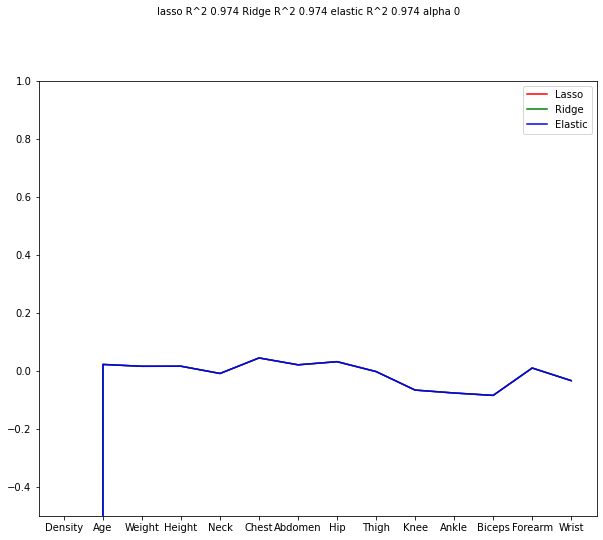

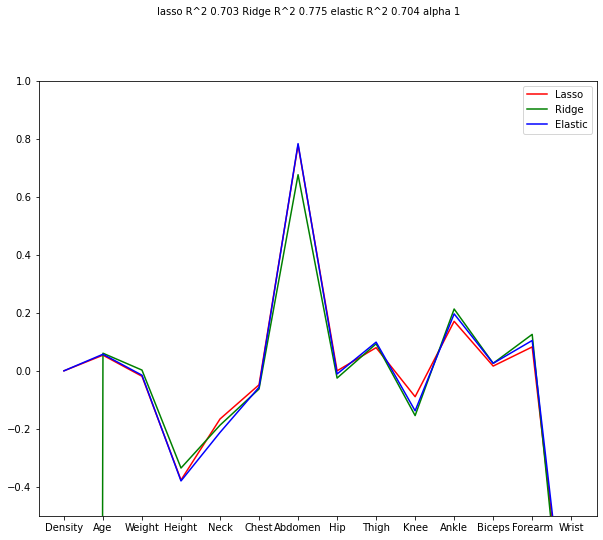

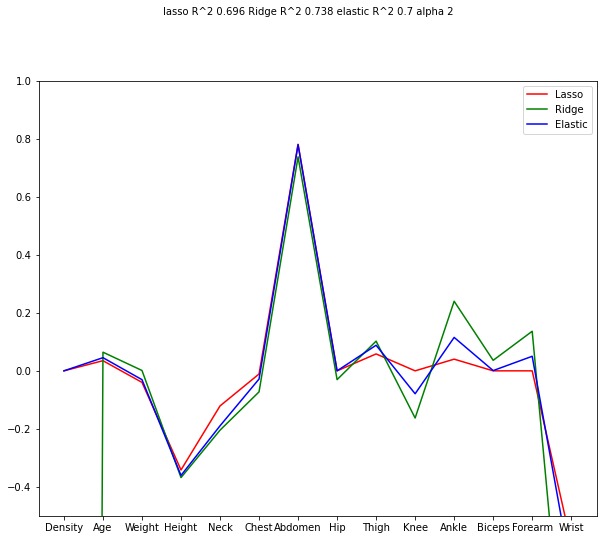

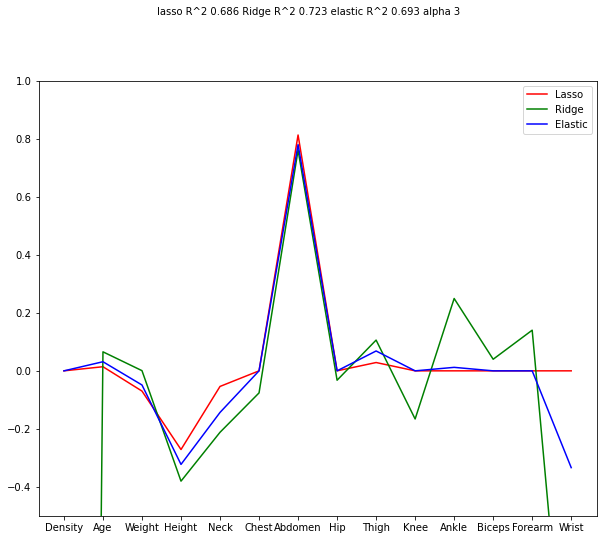

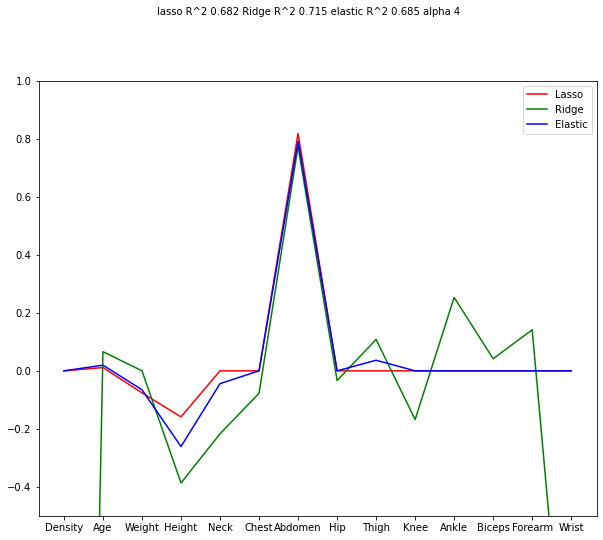

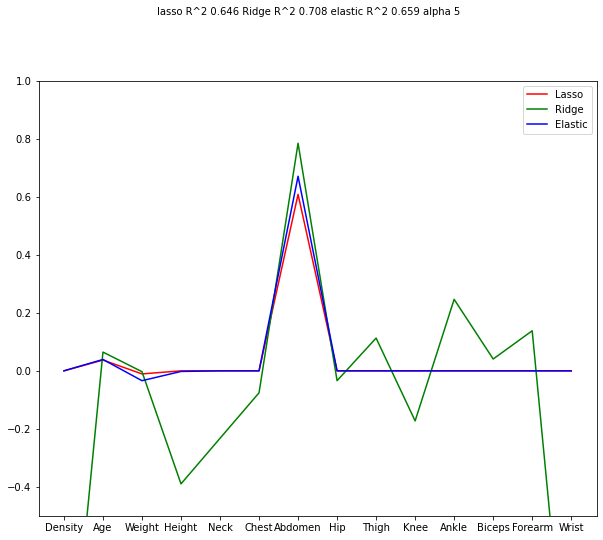

In [29]:
for i in range(6):
    a=lasso_df[features].loc[i]
    l=round(lasso_df["lasso_Squ"].loc[i],3)
    r=round(Ridge_df["Ridge_Squ"].loc[i],3)
    e=round(ela_graph["elastic_Squ"].loc[i],3)
    b=Ridge_df[features].loc[i]
    c=ela_graph[features].loc[i]
    plt.figure(figsize=(10,8))    
    plt.figtext(0.5,1,"lasso R^2 " + str(l)+" Ridge R^2 " + str(r)+" elastic R^2 " + str(e) + " alpha " + str(i), ha="center", va="center")
    plt.plot(features, a, color='r', label='Lasso')
    plt.plot(features, b, color='g', label='Ridge')
    plt.plot(features, c, color='b', label='Elastic')
    plt.ylim([-0.5,1])
    plt.legend()
    plt.show